# Environment Setup

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# First part

Google Analytics data processing using BigQuery, Pandas and Matplotlib

In [4]:
import matplotlib.pyplot as plt
from google.cloud import bigquery 
import bq_helper
from bq_helper import BigQueryHelper


The connection to the BigQuery data source is established. First using the library BigQuery and after using the BigQueryHelper Library

In [5]:
#Using BigQuery
bq = bigquery.Client()

#Using BigQueryHelper
google_analytics = bq_helper.BigQueryHelper(active_project="bigquery-public-data", dataset_name="data:google_analytics_sample")
bqh = BigQueryHelper("bigquery-public-data", "google_analytics_sample")

Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.


# Preliminary analysis
The BigQuery dataset tables are listed. Only the first 3 tables are shown and the number of tables that are in the dataset.

In [6]:
#Listing
table_list = bqh.list_tables()

#Print the result. Note: Elements that are not string by string must be parsed in order to be represented. This is done by entering the element in the str() function.
print ('Number of tables: ' + str(len(table_list)) +  '\nFirst 5 tables: ' + str(table_list[0:5]))

Number of tables: 366
First 5 tables: ['ga_sessions_20160801', 'ga_sessions_20160802', 'ga_sessions_20160803', 'ga_sessions_20160804', 'ga_sessions_20160805']


The first 10 rows of the first table in the list are examined

In [7]:
bqh.head(table_list[4], num_rows=10)

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,None,1,1470384509,1470384509,20160805,"{'visits': 1, 'hits': 2, 'pageviews': 2, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 1, 'minut...",7443858563401308338,None,Direct,Not Socially Engaged
1,None,1,1470440277,1470440277,20160805,"{'visits': 1, 'hits': 2, 'pageviews': 2, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 16, 'minu...",7199058011591707522,None,Organic Search,Not Socially Engaged
2,None,1,1470420561,1470420561,20160805,"{'visits': 1, 'hits': 3, 'pageviews': 3, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",0971496584597288860,None,Direct,Not Socially Engaged
3,None,1,1470449322,1470449322,20160805,"{'visits': 1, 'hits': 3, 'pageviews': 3, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 19, 'minu...",9181275443615996946,None,Organic Search,Not Socially Engaged
4,None,1,1470383689,1470383689,20160805,"{'visits': 1, 'hits': 4, 'pageviews': 4, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 0, 'minut...",0533985195352177296,None,Organic Search,Not Socially Engaged
5,None,1,1470465390,1470465390,20160805,"{'visits': 1, 'hits': 4, 'pageviews': 3, 'time...","{'referralPath': None, 'campaign': 'Data Share...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'South...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 23, 'minu...",49637949447489504,None,Affiliates,Not Socially Engaged
6,None,3,1470427518,1470427518,20160805,"{'visits': 1, 'hits': 4, 'pageviews': 4, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0334862614244150114,None,Organic Search,Not Socially Engaged
7,None,1,1470448980,1470448980,20160805,"{'visits': 1, 'hits': 4, 'pageviews': 4, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 19, 'minu...",9131475862416280272,None,Organic Search,Not Socially Engaged
8,None,4,1470448808,1470448808,20160805,"{'visits': 1, 'hits': 4, 'pageviews': 4, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 19, 'minu...",5095003808516648444,None,Organic Search,Not Socially Engaged
9,None,4,1470450894,1470450894,20160805,"{'visits': 1, 'hits': 4, 'pageviews': 4, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","

# Highlights:

1. visitStartTime: is in a UNIX time format, that is, they are the second since midnight on 1 January 1970. This format is also known as the Unix Epoch or POSIX time.
1. The date is not formatted in dd-mm-yyyy format. That is, from 20160804 to 04-08-2016. The visitStartTime and date columns could be condensed. Resulting in a date and time format according to ISO 8601 (yyyy-MM-ddThh:mm:ss+00:00).
1. It would be convenient to analyze all the data from the columns that are in tuples (JSON), as they are: totals, trafficSource, device, geoNetwork, customDimensions and hits.
1. The table structure is analyzed using .table_schema() and referring to the first table in the list.

In [8]:
bqh.table_schema(table_list[4])

/src/bq-helper/bq_helper.py:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  'fields': pd.np.nan,


,name,type,mode,description
0,visitorId,INTEGER,NULLABLE,None
1,visitNumber,INTEGER,NULLABLE,None
2,visitId,INTEGER,NULLABLE,None
3,visitStartTime,INTEGER,NULLABLE,None
4,date,STRING,NULLABLE,None
...,...,...,...,...
331,hits.publisher_infos.dfpNetworkId,STRING,NULLABLE,None
332,fullVisitorId,STRING,NULLABLE,None
333,userId,STRING,NULLABLE,None
334,channelGrouping,STRING,NULLABLE,None


* The size of the data you are working with is displayed. This gives us a reference of the best way to work and the moment in which it is more optimal to dump the data in a Pandas DataFrame.
* 
* SQL Syntax in BigQuery
* VERY IMPORTANT: Avoid the SELECT FROM ...* due to the high computational (and economic) cost of this query More information about good practices in BigQuery prices.
* 
* The size of the dataset is queried and divide the size in bytes by  230  to get the size in GB.

In [10]:
#The query to be executed
size_query = """
SELECT
    SUM(size_bytes) Bytes
FROM
    `bigquery-public-data.google_analytics_sample.__TABLES__`
"""

#Query execution and save the result in a data frame. The name of the colums of the dataset are defined in the query.
size_result = bq.query(size_query).to_dataframe()

print('The dataset size is ' + str(round(size_result.iloc[0]['Bytes']/(2**30),3)) + ' GB')

The dataset size is 5.371 GB


The entire dataset occupies several Gigabytes. As it is a dynamic dataset this size will change over time. Currently, (24/10/2020) the size is 5.371 GB.

The attributes in JSON format are investigated. A query is made for this analysis

In [11]:
JSON_query = """
SELECT
    totals,
    trafficSource,
    device,
    geoNetwork,
    customDimensions,
    hits
FROM
    `bigquery-public-data.google_analytics_sample."""+ bqh.list_tables()[4] +"""`
LIMIT 1
"""
JSON_result = bq.query(JSON_query).to_dataframe()

print('totals: \n' +
str(JSON_result.iloc[0]['totals']) +
'\n\ntrafficSource: \n'+
str(JSON_result.iloc[0]['trafficSource'])+
'\n\ndevice: \n'+
str(JSON_result.iloc[0]['device']) +
'\n\ngeoNetwork: \n'+
str(JSON_result.iloc[0]['geoNetwork'])+
'\n\ncustomDimensions: \n'+
str(JSON_result.iloc[0]['customDimensions'])+
'\n\nhits: \n' +
str(JSON_result.iloc[0]['hits']))

totals: 
{'visits': 1, 'hits': 2, 'pageviews': 2, 'timeOnSite': 12, 'bounces': None, 'transactions': None, 'transactionRevenue': None, 'newVisits': 1, 'screenviews': None, 'uniqueScreenviews': None, 'timeOnScreen': None, 'totalTransactionRevenue': None, 'sessionQualityDim': None}

trafficSource: 
{'referralPath': None, 'campaign': '(not set)', 'source': '(direct)', 'medium': '(none)', 'keyword': None, 'adContent': None, 'adwordsClickInfo': {'campaignId': None, 'adGroupId': None, 'creativeId': None, 'criteriaId': None, 'page': None, 'slot': None, 'criteriaParameters': 'not available in demo dataset', 'gclId': None, 'customerId': None, 'adNetworkType': None, 'targetingCriteria': None, 'isVideoAd': None}, 'isTrueDirect': True, 'campaignCode': None}

device: 
{'browser': 'Chrome', 'browserVersion': 'not available in demo dataset', 'browserSize': 'not available in demo dataset', 'operatingSystem': 'Windows', 'operatingSystemVersion': 'not available in demo dataset', 'isMobile': False, 'mobi

# Information to collect
1. Visits per year: date attribute.
1. Visits per month: date attribute.
1. Visits by geographical area: geoNetwork attribute continent element.
1. Visits by country: geoNetwork attribute country element.
1. Visits by city in the country that you visit the most: geoNetwork attribute city element.
1. Social engagement: atributo socialEngagementType.
1. Channel grouping: channelGrouping attribute.
1. Browsers usegae: device attribute browser element.
1. OS usage: device attribute operatingSystem element.
1. Mobile device displays: device attribute operatingSystem element.

Analysis and visualization
At this point, and knowing the data we have available, it starts to make the analysis of the data.

1. Visits per year
1.1. Querying and obtaining the dataset
The SUBSTRING function will be used to "trim" the year. This function indicates the start and end position to be extracted.

At first, this was done using the LEFT function, but it was not executed correctly, obtaining an error at the output (19/07/2020). I don't know the reason for this, but I know that this function is more recent than the SUBSTRING function, maybe because in the python library (google.cloud bigquery) it is still not correctly implemented.

Otro hecho a destacar es el cambio de bigquery-public-data.google_analytics_sample.TABLE por *bigquery-public-data.google_analytics_sample.**. DOCUMENTATION.

In [12]:
year_query = """
SELECT substr(date,0,4) Year,
        COUNT(*) Visits
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY Year
"""
year_result = bq.query(year_query).to_dataframe()
year_result

,Year,Visits
0,2017,467260
1,2016,436393


# Visualization of the result

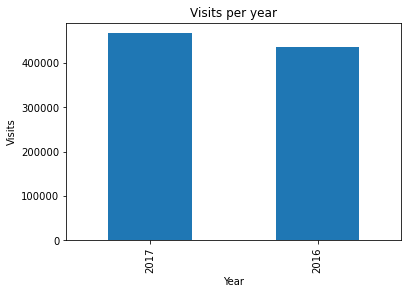

In [13]:
#The bar plot plot
year_graph = year_result.plot(kind='bar',x='Year',y='Visits')
#Title
year_graph.set_title('Visits per year')
#Removing the legend because does not add any important information
year_graph.legend().remove()
#Set the y and x axis labels
year_graph.set_ylabel('Visits')
year_graph.set_xlabel('Year')
plt.show()


# Visits per month

In [14]:
month_query = """
SELECT CONCAT(substr(date,0,4),'-', substr(date,5,2)) Month,
        COUNT(*) Visits
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY Month
ORDER BY Month
"""
month_result = bq.query(month_query).to_dataframe()
month_result

,Month,Visits
0,2016-08,74759
1,2016-09,71032
2,2016-10,97506
3,2016-11,113972
4,2016-12,79124
5,2017-01,64694
6,2017-02,62192
7,2017-03,69931
8,2017-04,67126
9,2017-05,65371


Visualization of the result for monthly

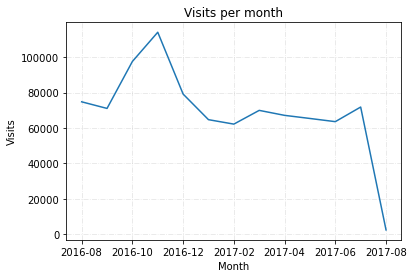

In [16]:
month_graph = month_result.plot(kind='line',x='Month',y='Visits')
month_graph.set_title('Visits per month')
month_graph.legend().remove()
month_graph.set_ylabel('Visits')
month_graph.set_xlabel('Month')
#Adding a grid in the plot for improve the visualization
month_graph.xaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
month_graph.yaxis.grid(True, linestyle='-.', which='major', color='grey', alpha=.2)
plt.show()

# Visits by geographical area
 Querying and obtaining the dataset
In this query, the difficulty encountered is the extraction of the continent element within the JSON. To do this you simply have to join the attribute and subattribute with a point, i.e. geoNetwork.continent.



In [17]:
zone_query = """
SELECT geoNetwork.continent Area,
        COUNT(*) Visits
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY Area
ORDER BY Visits
"""
zone_result = bq.query(zone_query).to_dataframe()
zone_result

,Area,Visits
0,(not set),1468
1,Africa,14745
2,Oceania,15054
3,Europe,198311
4,Asia,223698
5,Americas,450377


Visualization of the result

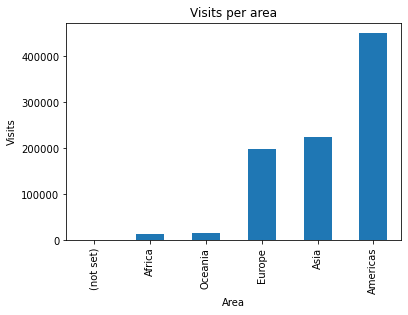

In [18]:
zone_graph = zone_result.plot(kind='bar',x='Area',y='Visits')
zone_graph.set_title('Visits per area')
zone_graph.legend().remove()
zone_graph.set_ylabel('Visits')
zone_graph.set_xlabel('Area')
plt.show()

# Visits per country
Querying and obtaining the dataset


In [19]:
country_query = """
SELECT geoNetwork.country Country,
        COUNT(*) Visits
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY Country
ORDER BY Visits DESC
"""
country_result = bq.query(country_query).to_dataframe()
country_result

,Country,Visits
0,United States,364744
1,India,51140
2,United Kingdom,37393
3,Canada,25869
4,Vietnam,24598
...,...,...
217,American Samoa,1
218,St. Barthélemy,1
219,Norfolk Island,1
220,São Tomé & Príncipe,1


# Visualization of the result

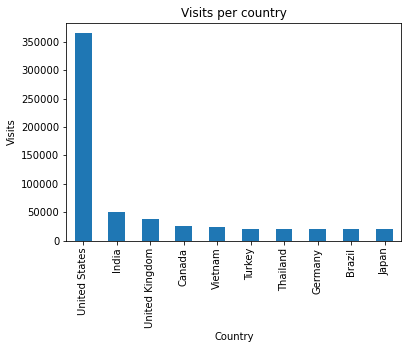

In [20]:
country_graph = country_result.iloc[0:10].plot(kind='bar',x='Country',y='Visits')
country_graph.set_title('Visits per country')
country_graph.legend().remove()
country_graph.set_ylabel('Visits')
country_graph.set_xlabel('Country')
plt.show()

# Visits per city

In [21]:
city_query = """
SELECT geoNetwork.city City,
        COUNT(*) Visits
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
WHERE geoNetwork.country = (
    SELECT Country FROM ( 
        SELECT geoNetwork.country Country, COUNT(*) Visits 
            FROM 
                `bigquery-public-data.google_analytics_sample.*`
                GROUP BY Country ORDER BY Visits DESC) S LIMIT 1)
GROUP BY City
ORDER BY Visits DESC
"""
city_result = bq.query(city_query).to_dataframe()
city_result

,City,Visits
0,not available in demo dataset,177760
1,Mountain View,40659
2,New York,26228
3,San Francisco,20206
4,Sunnyvale,13008
...,...,...
251,Abu Dhabi,1
252,Mississauga,1
253,Chennai,1
254,Rome,1


On the top the result is as expected, but on the bottom there is surprise, there are cities like Rome which obviously do not belong to the USA. In point 4.3, this anomaly in the data will be investigated in depth.

4.2. Visualization of the result
The result is plotted on a bar chart. Because displaying such a high number of records (more than 200) would make the graph unreadable, we chose to show only the results from the second to the sixth (TOP 5).

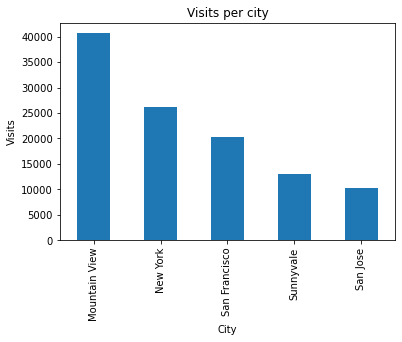

In [22]:
city_graph = city_result.iloc[1:6].plot(kind='bar',x='City',y='Visits')
city_graph.set_title('Visits per city')
city_graph.legend().remove()
city_graph.set_ylabel('Visits')
city_graph.set_xlabel('City')
plt.show()

# Anomalies in the dataset

In [23]:
city_an_query = """
SELECT geoNetwork.city City,
        geoNetwork.country Country,
        COUNT(*) Visits
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
WHERE geoNetwork.country = (
    SELECT Country FROM ( 
        SELECT geoNetwork.country Country, COUNT(*) Visits 
            FROM 
                `bigquery-public-data.google_analytics_sample.*`
                GROUP BY Country ORDER BY Visits DESC) S LIMIT 1)
GROUP BY City, Country
ORDER BY Visits DESC
"""
city_an_result = bq.query(city_an_query).to_dataframe()
city_an_result

,City,Country,Visits
0,not available in demo dataset,United States,177760
1,Mountain View,United States,40659
2,New York,United States,26228
3,San Francisco,United States,20206
4,Sunnyvale,United States,13008
...,...,...,...
251,Brussels,United States,1
252,Mississauga,United States,1
253,Kyiv,United States,1
254,Abu Dhabi,United States,1


As we have seen before, there is an anomaly and we can see that there is no relationship of integrity between cities and countries. You can see cities that don't belong to the United States.

In the next query, we will return the cities that appear in more than one country.

In [24]:
city_country_an_query = """
SELECT  City,
        COUNT(*) CountCountry
        FROM (
            SELECT DISTINCT geoNetwork.city City, geoNetwork.country Country  
            FROM `bigquery-public-data.google_analytics_sample.*`
            )
GROUP BY City
HAVING CountCountry > 1
ORDER BY CountCountry DESC         
"""
city_country_an_result = bq.query(city_country_an_query).to_dataframe()

for i in range(city_country_an_result.shape[0]):
    print(str(city_country_an_result.iloc[i]['City']) + ' -> ' + str(city_country_an_result.iloc[i]['CountCountry']))

not available in demo dataset -> 201
(not set) -> 170
Mountain View -> 38
San Francisco -> 32
New York -> 28
London -> 23
San Jose -> 22
Sunnyvale -> 16
Los Angeles -> 16
Paris -> 14
Dublin -> 14
Singapore -> 12
Seattle -> 11
Santa Clara -> 10
Palo Alto -> 10
Chicago -> 9
Warsaw -> 9
Sydney -> 8
Hong Kong -> 7
Ningbo -> 7
Madrid -> 7
Amsterdam -> 6
Zurich -> 6
Toronto -> 6
Bengaluru -> 6
Bangkok -> 6
Istanbul -> 6
Austin -> 6
Kirkland -> 6
Seoul -> 5
Minato -> 5
Vienna -> 5
Munich -> 5
Milan -> 5
Jakarta -> 5
Dubai -> 4
Berlin -> 4
Santiago -> 4
Salem -> 4
Osaka -> 4
Bogota -> 4
San Diego -> 4
Tel Aviv-Yafo -> 4
Rome -> 4
San Bruno -> 4
Washington -> 4
Cambridge -> 4
Houston -> 4
Mumbai -> 4
Chennai -> 3
Stanford -> 3
Dallas -> 3
Redwood City -> 3
Mexico City -> 3
Ann Arbor -> 3
Cupertino -> 3
Hyderabad -> 3
Kuala Lumpur -> 3
Frankfurt -> 3
Sao Paulo -> 3
Tunis -> 3
Buenos Aires -> 3
New Delhi -> 3
Prague -> 3
San Mateo -> 3
Barcelona -> 3
Mississauga -> 3
Shinjuku -> 3
Hamburg -> 3
Mi

To minimize these errors, a query could be made that includes the "correct list" of countries and cities. Assuming that the correct country containing that city is the one from which most visits have occurred. That is, the one that has the highest counter of the country/city relationship and the visits made.

This is done by partitioning the data using the ROW_NUMBER function. The ROW_NUMBER function is chosen over other functions because of the way it manages ties.

In [25]:
city_country_test_query = """
    SELECT geoNetwork.city City, 
            geoNetwork.country Country,
            Count(*) Count, 
            ROW_NUMBER() OVER (PARTITION BY geoNetwork.city ORDER BY Count(*) DESC) AS row_num 
    FROM `bigquery-public-data.google_analytics_sample.*`
    GROUP BY Country, City
    ORDER BY City, row_num
"""
city_country_test_result = bq.query(city_country_test_query).to_dataframe()

for i in range(city_country_test_result.shape[0]):
    print(str(city_country_test_result.iloc[i]['City']) + ' -> ' + 
          str(city_country_test_result.iloc[i]['Country']) + 
          ' (RANKING: ' + str(city_country_test_result.iloc[i]['row_num']) + 
          ' COUNTER: ' + str(city_country_test_result.iloc[i]['Count']) + ')' )

's Hertogenbosch -> Netherlands (RANKING: 1 COUNTER: 7)
(not set) -> Taiwan (RANKING: 1 COUNTER: 7659)
(not set) -> United States (RANKING: 2 COUNTER: 7195)
(not set) -> Singapore (RANKING: 3 COUNTER: 3388)
(not set) -> Thailand (RANKING: 4 COUNTER: 3138)
(not set) -> India (RANKING: 5 COUNTER: 2276)
(not set) -> (not set) (RANKING: 6 COUNTER: 1442)
(not set) -> Bangladesh (RANKING: 7 COUNTER: 1359)
(not set) -> Hong Kong (RANKING: 8 COUNTER: 915)
(not set) -> Peru (RANKING: 9 COUNTER: 853)
(not set) -> Vietnam (RANKING: 10 COUNTER: 522)
(not set) -> Japan (RANKING: 11 COUNTER: 497)
(not set) -> Greece (RANKING: 12 COUNTER: 486)
(not set) -> Algeria (RANKING: 13 COUNTER: 347)
(not set) -> Côte d’Ivoire (RANKING: 14 COUNTER: 263)
(not set) -> United Kingdom (RANKING: 15 COUNTER: 261)
(not set) -> Kosovo (RANKING: 16 COUNTER: 238)
(not set) -> Dominican Republic (RANKING: 17 COUNTER: 208)
(not set) -> Netherlands (RANKING: 18 COUNTER: 200)
(not set) -> Jordan (RANKING: 19 COUNTER: 192)
(

Budapest -> Hungary (RANKING: 1 COUNTER: 540)
Buenos Aires -> Argentina (RANKING: 1 COUNTER: 1221)
Buenos Aires -> United States (RANKING: 2 COUNTER: 4)
Buenos Aires -> Brazil (RANKING: 3 COUNTER: 1)
Buon Ma Thuot -> Vietnam (RANKING: 1 COUNTER: 157)
Burlington -> United States (RANKING: 1 COUNTER: 10)
Burnaby -> Canada (RANKING: 1 COUNTER: 159)
Bursa -> Turkey (RANKING: 1 COUNTER: 378)
Byron -> United States (RANKING: 1 COUNTER: 6)
Cabimas -> Venezuela (RANKING: 1 COUNTER: 7)
Cagliari -> Italy (RANKING: 1 COUNTER: 19)
Cairo -> Egypt (RANKING: 1 COUNTER: 94)
Calgary -> Canada (RANKING: 1 COUNTER: 216)
Cali -> Colombia (RANKING: 1 COUNTER: 42)
Cambridge -> United States (RANKING: 1 COUNTER: 1582)
Cambridge -> Canada (RANKING: 2 COUNTER: 1)
Cambridge -> Spain (RANKING: 3 COUNTER: 1)
Cambridge -> Ireland (RANKING: 4 COUNTER: 1)
Camden -> United States (RANKING: 1 COUNTER: 24)
Campbell -> United States (RANKING: 1 COUNTER: 5)
Campinas -> Brazil (RANKING: 1 COUNTER: 64)
Can Tho -> Vietnam (

London -> Canada (RANKING: 2 COUNTER: 167)
London -> United States (RANKING: 3 COUNTER: 97)
London -> Ireland (RANKING: 4 COUNTER: 16)
London -> Spain (RANKING: 5 COUNTER: 11)
London -> Germany (RANKING: 6 COUNTER: 6)
London -> France (RANKING: 7 COUNTER: 6)
London -> Italy (RANKING: 8 COUNTER: 6)
London -> Netherlands (RANKING: 9 COUNTER: 4)
London -> Japan (RANKING: 10 COUNTER: 3)
London -> Argentina (RANKING: 11 COUNTER: 2)
London -> Sweden (RANKING: 12 COUNTER: 2)
London -> Portugal (RANKING: 13 COUNTER: 2)
London -> Singapore (RANKING: 14 COUNTER: 1)
London -> Qatar (RANKING: 15 COUNTER: 1)
London -> Switzerland (RANKING: 16 COUNTER: 1)
London -> Saudi Arabia (RANKING: 17 COUNTER: 1)
London -> Indonesia (RANKING: 18 COUNTER: 1)
London -> Croatia (RANKING: 19 COUNTER: 1)
London -> Greece (RANKING: 20 COUNTER: 1)
London -> Poland (RANKING: 21 COUNTER: 1)
London -> India (RANKING: 22 COUNTER: 1)
London -> Belgium (RANKING: 23 COUNTER: 1)
Longtan District -> Taiwan (RANKING: 1 COUNTER

San Jose -> Australia (RANKING: 17 COUNTER: 1)
San Jose -> Switzerland (RANKING: 18 COUNTER: 1)
San Jose -> Vietnam (RANKING: 19 COUNTER: 1)
San Jose -> United Kingdom (RANKING: 20 COUNTER: 1)
San Jose -> Slovenia (RANKING: 21 COUNTER: 1)
San Jose -> Puerto Rico (RANKING: 22 COUNTER: 1)
San Marcos -> United States (RANKING: 1 COUNTER: 28)
San Mateo -> United States (RANKING: 1 COUNTER: 339)
San Mateo -> Ireland (RANKING: 2 COUNTER: 1)
San Mateo -> Japan (RANKING: 3 COUNTER: 1)
San Salvador -> El Salvador (RANKING: 1 COUNTER: 5)
Sandton -> South Africa (RANKING: 1 COUNTER: 6)
Sandy -> United States (RANKING: 1 COUNTER: 6)
Sandy Springs -> United States (RANKING: 1 COUNTER: 6)
Sant Cugat del Valles -> Spain (RANKING: 1 COUNTER: 13)
Santa Ana -> United States (RANKING: 1 COUNTER: 15)
Santa Clara -> United States (RANKING: 1 COUNTER: 3162)
Santa Clara -> Canada (RANKING: 2 COUNTER: 8)
Santa Clara -> China (RANKING: 3 COUNTER: 4)
Santa Clara -> Japan (RANKING: 4 COUNTER: 3)
Santa Clara -> T

As you can see this solution is not perfect, but it is effective in a very high percentage of cases and automatic. Later we made a supra query to show only the RANKING 1.

In [26]:
city_country_query = """
SELECT 
    Country,
    City
FROM (
        SELECT geoNetwork.city City, 
            geoNetwork.country Country,
            Count(*) Count, 
            ROW_NUMBER() OVER (PARTITION BY geoNetwork.city ORDER BY Count(*) DESC) AS row_num 
        FROM `bigquery-public-data.google_analytics_sample.*`
        GROUP BY Country, City
        ORDER BY City, row_num )
WHERE row_num = 1
ORDER BY Country, City
"""
city_country_result = bq.query(city_country_query).to_dataframe()

for i in range(city_country_result.shape[0]):
    print(str(city_country_result.iloc[i]['Country']) + ' -> ' + str(city_country_result.iloc[i]['City']) )

Albania -> Tirana
Argentina -> Buenos Aires
Argentina -> Cordoba
Argentina -> Mar del Plata
Argentina -> Pinamar
Argentina -> Rosario
Argentina -> Santa Fe
Australia -> Adelaide
Australia -> Brisbane
Australia -> Melbourne
Australia -> Perth
Australia -> Sydney
Australia -> Wollongong
Austria -> Hallein
Austria -> Saint Polten
Austria -> Salzburg
Austria -> Vienna
Azerbaijan -> Baku
Bangladesh -> Dhaka
Belarus -> Brest
Belarus -> Minsk
Belgium -> Antwerp
Belgium -> Bruges
Belgium -> Brussels
Belgium -> Ghent
Belgium -> Kortrijk
Belgium -> Leuven
Belgium -> Mechelen
Belgium -> Zaventem
Brazil -> Atibaia
Brazil -> Belo Horizonte
Brazil -> Brasilia
Brazil -> Campinas
Brazil -> Cuiaba
Brazil -> Curitiba
Brazil -> Florianopolis
Brazil -> Fortaleza
Brazil -> Goiania
Brazil -> Manaus
Brazil -> Porto Alegre
Brazil -> Recife
Brazil -> Ribeirao Preto
Brazil -> Rio de Janeiro
Brazil -> Salvador
Brazil -> Sao Paulo
Brazil -> Vila Velha
Bulgaria -> Sofia
Cambodia -> Phnom Penh
Canada -> Barrie
Cana

To correct the dataset city_result, the query should be merged with city_country_query.

In [27]:
#We store this query in a variable because it will be used twice in the subsequent query.
country_sub_query = """(
SELECT 
    Country 
FROM ( 
        SELECT geoNetwork.country Country, COUNT(*) Visits 
            FROM 
                `bigquery-public-data.google_analytics_sample.*`
                GROUP BY Country ORDER BY Visits DESC) S 
LIMIT 1)
"""


city_sol_query = """
SELECT geoNetwork.city City,
        COUNT(*) Visits
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
WHERE geoNetwork.country = """+ country_sub_query  +""" AND 
        geoNetwork.city  IN (SELECT 
                        City
                    FROM (
                            SELECT geoNetwork.city City, geoNetwork.country Country,Count(*) Contador, 
                            ROW_NUMBER() OVER (PARTITION BY geoNetwork.city ORDER BY Count(*) DESC) AS row_num 
                                FROM `bigquery-public-data.google_analytics_sample.*` GROUP BY Country, City )
            WHERE  row_num = 1 AND Country = """+ country_sub_query  +""")
GROUP BY geoNetwork.city 
ORDER BY Visits DESC
"""
city_sol_result = bq.query(city_sol_query).to_dataframe()

print('Number of records before -> Number of records after\n' 
      + str(city_result.shape[0]) + ' -> ' + str(city_sol_result.shape[0]) 
      + '\nReduction percentage: ' + str(round( 100*(city_result.shape[0]- city_sol_result.shape[0])/city_result.shape[0],2)) + ' %'  )

Number of records before -> Number of records after
256 -> 192
Reduction percentage: 25.0 %


SOLVED!
The dataset would be clean by now. And with a 25% reduction in data.

Visits by type of social engagement

In [28]:
social_query = """
SELECT socialEngagementType SocialEngadgementType,
        COUNT(*) Visits
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY SocialEngadgementType
ORDER BY Visits DESC
"""
social_result = bq.query(social_query).to_dataframe()
social_result


,SocialEngadgementType,Visits
0,Not Socially Engaged,903653


# Visits by channel grouping

In [29]:
channel_query = """
SELECT channelGrouping ChannelGrouping,
        COUNT(*) Visits
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY ChannelGrouping
ORDER BY Visits DESC
"""
channel_result = bq.query(channel_query).to_dataframe()
channel_result

,ChannelGrouping,Visits
0,Organic Search,381561
1,Social,226117
2,Direct,143026
3,Referral,104838
4,Paid Search,25326
5,Affiliates,16403
6,Display,6262
7,(Other),120


Display of the result

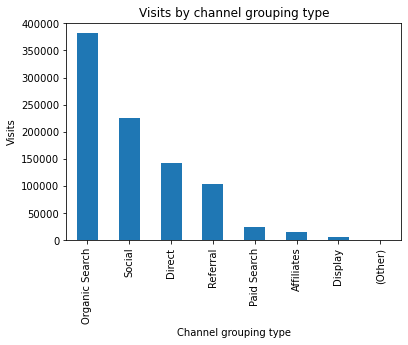

In [30]:
channel_graph = channel_result.plot(kind='bar',x='ChannelGrouping',y='Visits')
channel_graph.set_title('Visits by channel grouping type')
channel_graph.legend().remove()
channel_graph.set_ylabel('Visits')
channel_graph.set_xlabel('Channel grouping type')
plt.show()

#  Display by month

In [31]:
channel_month_query = """
SELECT channelGrouping ChannelGrouping,
        CONCAT(substr(date,0,4),'-', substr(date,5,2)) Month,
        COUNT(*) Visits
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY ChannelGrouping, Month
ORDER BY Month, ChannelGrouping
"""
channel_month_result = bq.query(channel_month_query).to_dataframe()
channel_month_result

,ChannelGrouping,Month,Visits
0,(Other),2016-08,2
1,Affiliates,2016-08,1909
2,Direct,2016-08,12163
3,Display,2016-08,449
4,Organic Search,2016-08,24143
...,...,...,...
94,Display,2017-08,39
95,Organic Search,2017-08,1346
96,Paid Search,2017-08,70
97,Referral,2017-08,436


 Display of the result

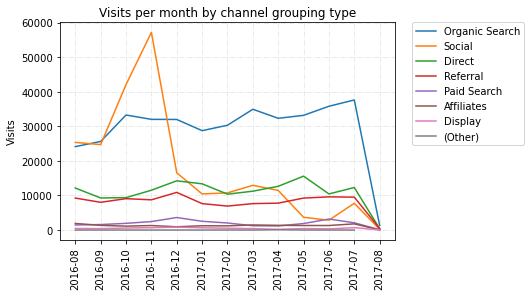

In [32]:
#To plot multiple lines plot use a for loop
for i in range(channel_result.shape[0]):
      plt.plot(channel_month_result.loc[channel_month_result['ChannelGrouping'] == channel_result.iloc[i]["ChannelGrouping"]]['Month'],channel_month_result.loc[channel_month_result['ChannelGrouping'] == channel_result.iloc[i]["ChannelGrouping"]]['Visits'] , label = channel_result.iloc[i]["ChannelGrouping"])

plt.title('Visits per month by channel grouping type')

plt.ylabel('Visits')
# Rotation of the x axis marks to visualize it properly 
plt.xticks(rotation = '90')
# To improve the display, the legend box is taken out of the drawing area.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.grid(True, linestyle='-.', which='major', axis = 'both' ,color='grey', alpha=.2)

#To save the plot
plt.savefig('Visits_perMonth_by_channelGrouping.png')
plt.show()

# Using browsers, operating systems and mobile phones

Querying and obtaining the dataset

In [ ]:
#Información compuesto por los 3 datos
device_query = """
SELECT device.browser Browser,
        device.operatingSystem OS,
        device.isMobile Smartphone,
        COUNT(*) Count
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY Browser, OS, Smartphone
ORDER BY Count DESC
"""
device_result = bq.query(device_query).to_dataframe()

browser_query = """
SELECT device.browser Browser,
        COUNT(*) Count
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY Browser
ORDER BY Count DESC
"""
browser_result = bq.query(browser_query).to_dataframe()

os_query = """
SELECT device.operatingSystem OS,
        COUNT(*) Count
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
GROUP BY OS
ORDER BY Count DESC
"""
os_result = bq.query(os_query).to_dataframe()

browser_desktop_query = """
SELECT device.browser Browser,
        COUNT(*) Count
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
        WHERE device.isMobile = False
GROUP BY Browser
ORDER BY Count DESC
"""
browser_desktop_result = bq.query(browser_desktop_query).to_dataframe()

browser_smartphone_query = """
SELECT device.browser Browser,
        COUNT(*) Count
        FROM 
            `bigquery-public-data.google_analytics_sample.*`
        WHERE device.isMobile = True
GROUP BY Browser
ORDER BY Count DESC
"""
browser_smartphone_result = bq.query(browser_smartphone_query).to_dataframe()

# Display of the result
All the information is displayed in a single figure consisting of several subfigures.

In [ ]:
# General data of the charts.
fig, ax = plt.subplots(2,2)
fig.set_figheight(16)
fig.set_figwidth(16)
fig.suptitle('OS and browser information', size = '16')

#Dividers are drawn
plt.plot([-1.75, -1.75], [-1.25, 4.5], color='grey', lw=1, clip_on=False)
plt.plot([-4.25, 1.25], [1.5, 1.5], color='grey', lw=1, clip_on=False)

#Graph 1: Position 0.0
#The DataFrame is modified to be readable, the first 5 results are printed and the rest are grouped under the label "Others"
#First the vectors are assembled
nav_res = []
cont_res = []
cont_sum = 0
for i in range(browser_result.shape[0]):
    if (i <= 4):
        nav_res.append(browser_result.iloc[i]['Browser'])
        cont_res.append(browser_result.iloc[i]['Count'])
    else:
        cont_sum += browser_result.iloc[i]['Count']
            
nav_res.append('Others')
cont_res.append(cont_sum)

#Then the dataset is formed
browser_result_print = pd.DataFrame({"Browser":nav_res, "Count":cont_res})
    
ax[0, 0].pie(browser_result_print.iloc[:]['Count'], labels = browser_result_print.iloc[:]['Browser'], autopct='%.0f%%', startangle=180)
ax[0,0].set_title('Browsers', size = '14')

#Graph 2: Position 0.1
#The same operation is performed with the operating system graphic. 
OS_res = []
cont_res = []
cont_sum = 0
for i in range(os_result.shape[0]):
    if (i <= 5):
        OS_res.append(os_result.iloc[i]['OS'])
        cont_res.append(os_result.iloc[i]['Count'])
    else:
        cont_sum += os_result.iloc[i]['Count']
            
OS_res.append('Others')
cont_res.append(cont_sum)

#Then the dataset is formed
OS_result_print = pd.DataFrame({"OS":OS_res, "Count":cont_res})

ax[0, 1].pie(OS_result_print.iloc[:]['Count'], labels = OS_result_print.iloc[:]['OS'], autopct='%.0f%%' )
ax[0,1].set_title('OS', size = '14')

#Graph 3: Position 1.0
# Use of browsers on desktop computers
nav_res = []
cont_res = []
cont_sum = 0
for i in range(browser_desktop_result.shape[0]):
    if (i <= 4):
        nav_res.append(browser_desktop_result.iloc[i]['Browser'])
        cont_res.append(browser_desktop_result.iloc[i]['Count'])
    else:
        cont_sum += browser_desktop_result.iloc[i]['Count']
            
nav_res.append('Others')
cont_res.append(cont_sum)


browser_result_desktop_print = pd.DataFrame({"Browser":nav_res, "Count":cont_res})
    
ax[1, 0].pie(browser_result_desktop_print.iloc[:]['Count'], labels = browser_result_desktop_print.iloc[:]['Browser'], autopct='%.0f%%', startangle=180 )
ax[1,0].set_title('Desktop browsers', size = '14')

#Graph 4: Position 1.1
# Use of browsers on mobile devices
nav_res = []
cont_res = []
cont_sum = 0
for i in range(browser_smartphone_result.shape[0]):
    if (i <= 4):
        nav_res.append(browser_smartphone_result.iloc[i]['Browser'])
        cont_res.append(browser_smartphone_result.iloc[i]['Count'])
    else:
        cont_sum += browser_smartphone_result.iloc[i]['Count']
            
nav_res.append('Others')
cont_res.append(cont_sum)


browser_smartphone_result_print = pd.DataFrame({"Browser":nav_res, "Count":cont_res})
    
ax[1, 1].pie(browser_smartphone_result_print.iloc[:]['Count'], labels = browser_smartphone_result_print.iloc[:]['Browser'], autopct='%.0f%%' )
ax[1,1].set_title('Mobile browsers', size = '14')
plt.savefig('OS_and_browser_info.png')
